# Multi Class Classification Model

After removing rows with missing 'PCKT_LABEL' or 'RPL_RANK': (330826, 39)

Missing values check:
PACKET_ID                            0
SEGMENT_ID                      330826
PACKET_TYPE                          0
CONTROL_PACKET_TYPE/APP_NAME         0
SOURCE_ID                            0
DESTINATION_ID                       0
TRANSMITTER_ID                       0
RECEIVER_ID                          0
APP_LAYER_ARRIVAL_TIME(US)      330826
TRX_LAYER_ARRIVAL_TIME(US)      330826
NW_LAYER_ARRIVAL_TIME(US)            0
MAC_LAYER_ARRIVAL_TIME(US)           0
PHY_LAYER_ARRIVAL_TIME(US)           0
PHY_LAYER_START_TIME(US)             0
PHY_LAYER_END_TIME(US)               0
APP_LAYER_PAYLOAD(Bytes)        330826
TRX_LAYER_PAYLOAD(Bytes)        330826
NW_LAYER_PAYLOAD(Bytes)              0
MAC_LAYER_PAYLOAD(Bytes)             0
PHY_LAYER_PAYLOAD(Bytes)             0
PHY_LAYER_OVERHEAD(Bytes)            0
PACKET_STATUS                        0
LOCAL_ADDRESS                   330826
REMOTE

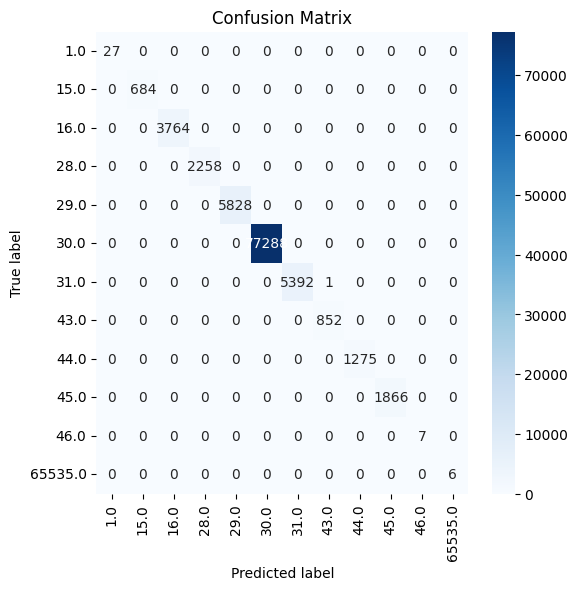

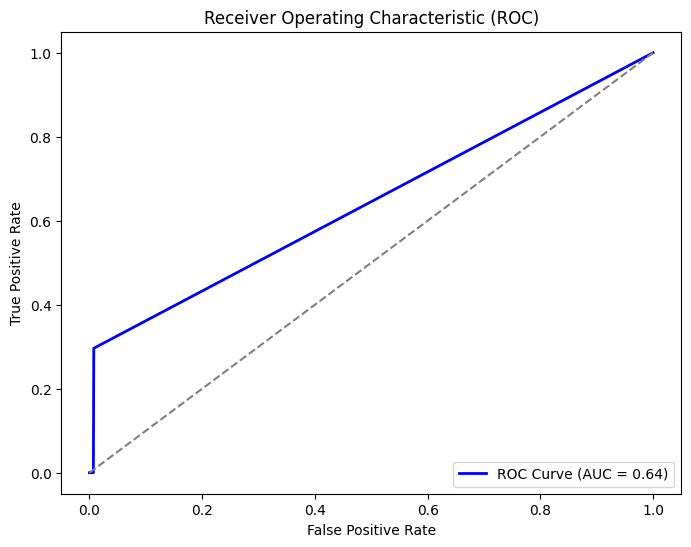

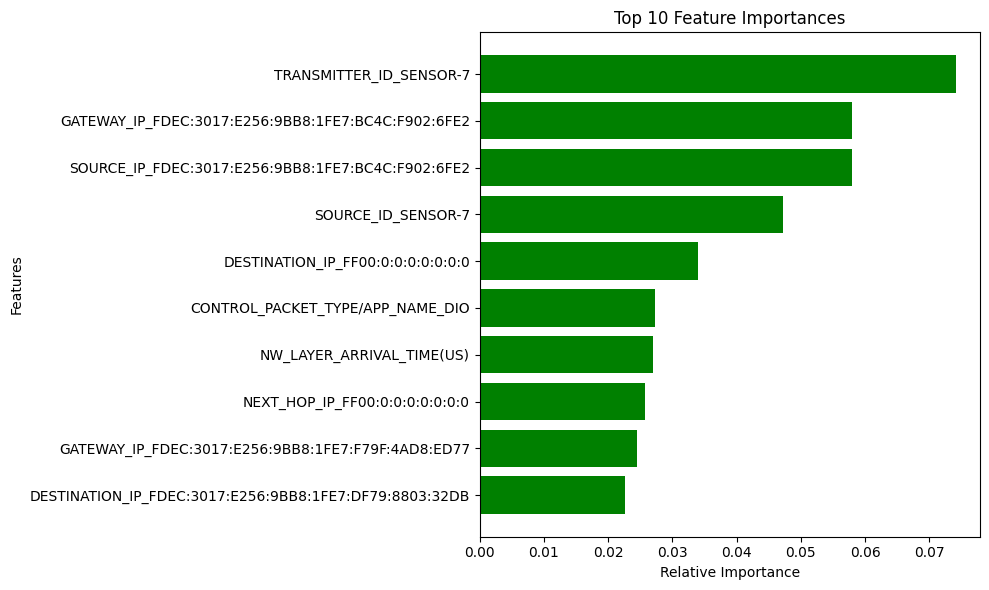

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('rank.csv')  # Load your dataset

# Remove rows with missing 'PCKT_LABEL' or 'RPL_RANK'
df = df.dropna(subset=['PCKT_LABEL', 'RPL_RANK'])

# Display the shape after removing rows with missing 'PCKT_LABEL' or 'RPL_RANK'
print("After removing rows with missing 'PCKT_LABEL' or 'RPL_RANK':", df.shape)

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns with the mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if there are any missing values left
print("\nMissing values check:")
print(df.isnull().sum())

# Prepare features and target variables
X = df.drop('RPL_RANK', axis=1)  # Features
y = df['RPL_RANK']               # Target variable

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\n========= Evaluation Metrics =========")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# ----------------------
# TOP 10 FEATURE IMPORTANCE
# ----------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

# Plot only the top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices], color='green')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Binary Class Classification Model

After removing missing labels: (330826, 39)

Missing values after cleaning:
 PACKET_ID                            0
SEGMENT_ID                      330826
PACKET_TYPE                          0
CONTROL_PACKET_TYPE/APP_NAME         0
SOURCE_ID                            0
DESTINATION_ID                       0
TRANSMITTER_ID                       0
RECEIVER_ID                          0
APP_LAYER_ARRIVAL_TIME(US)      330826
TRX_LAYER_ARRIVAL_TIME(US)      330826
NW_LAYER_ARRIVAL_TIME(US)            0
MAC_LAYER_ARRIVAL_TIME(US)           0
PHY_LAYER_ARRIVAL_TIME(US)           0
PHY_LAYER_START_TIME(US)             0
PHY_LAYER_END_TIME(US)               0
APP_LAYER_PAYLOAD(Bytes)        330826
TRX_LAYER_PAYLOAD(Bytes)        330826
NW_LAYER_PAYLOAD(Bytes)              0
MAC_LAYER_PAYLOAD(Bytes)             0
PHY_LAYER_PAYLOAD(Bytes)             0
PHY_LAYER_OVERHEAD(Bytes)            0
PACKET_STATUS                        0
LOCAL_ADDRESS                   330826
REMOTE_ADDRESS            

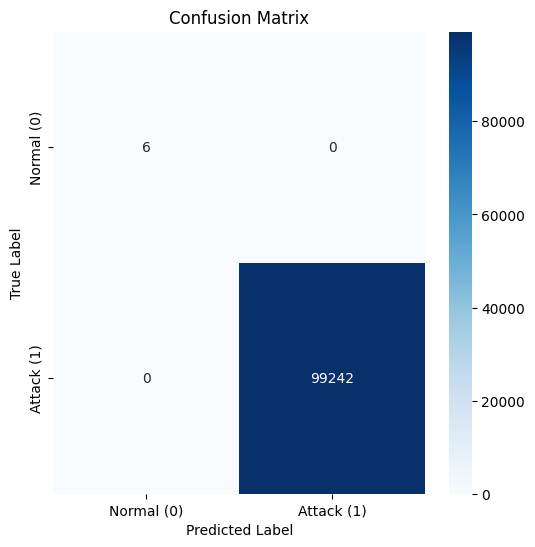

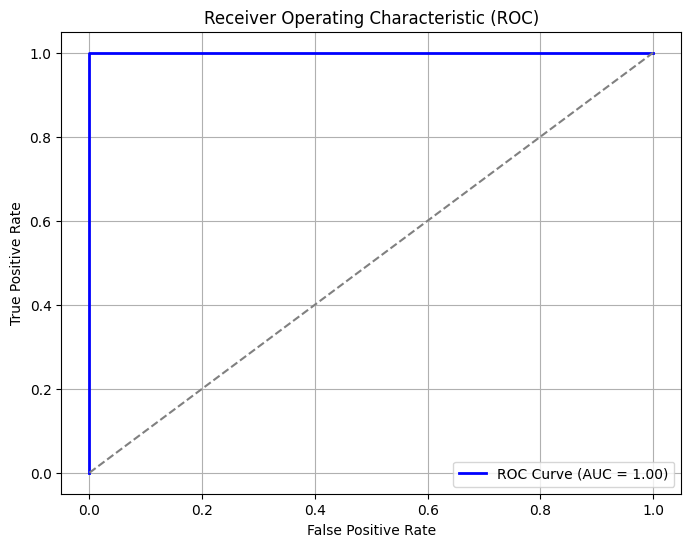

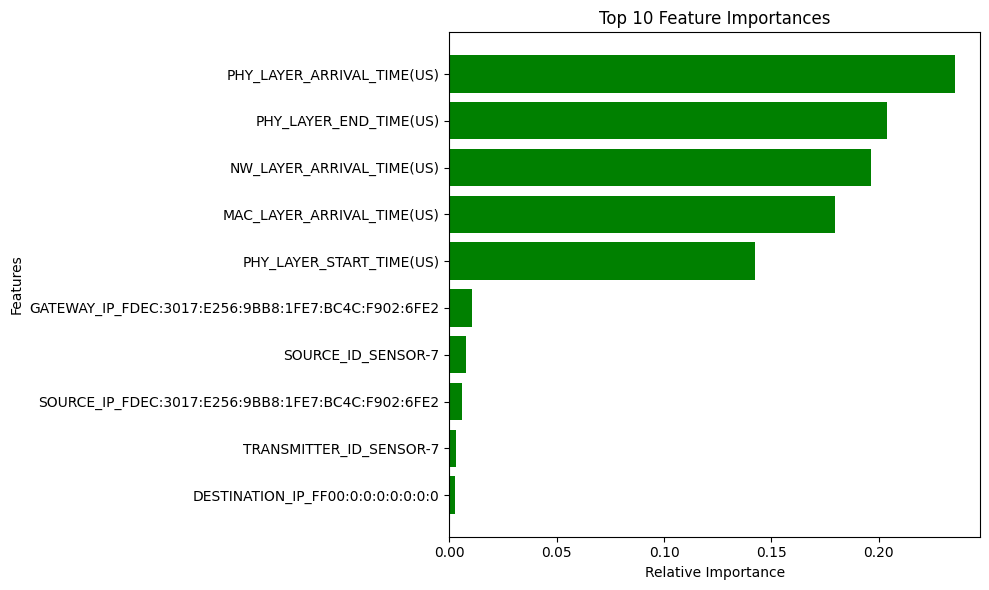

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('rank.csv')

# Remove rows with missing 'PCKT_LABEL' or 'RPL_RANK'
df = df.dropna(subset=['PCKT_LABEL', 'RPL_RANK'])

print("After removing missing labels:", df.shape)

# Fill missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("\nMissing values after cleaning:\n", df.isnull().sum())

# Convert RPL_RANK to binary: 1 = attack, 0 = normal (threshold can be adjusted)
threshold = 256
df['attack'] = df['RPL_RANK'].apply(lambda x: 1 if x < threshold else 0)

# Prepare features and target
X = df.drop(['RPL_RANK', 'attack'], axis=1)
y = df['attack']

# Encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print metrics
print("\n========= Evaluation Metrics =========")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal (0)", "Attack (1)"],
            yticklabels=["Normal (0)", "Attack (1)"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot Top 10 Feature Importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices], color='green')
plt.title('Top 10 Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()